In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=loadmat('ECGITtrain.mat')

In [3]:
X=data["inputECGITtrain"][:50,:1]
y=data['outputECGITtrain'][:50,:].reshape(len(X[:50,:]))
print(X.shape,y.shape)


(50, 1) (50,)


In [4]:
y

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1], dtype=uint8)

In [4]:
X=pd.DataFrame(data['inputECGITtrain'])

In [5]:
y=pd.DataFrame(data['outputECGITtrain'])

In [6]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,302,303,304,305,306,307,308,309,310,311
0,0.000000,0.000000,0.000000,1.263726,9.260168,0.000000,0.000000,0.000000,0.000000,3.122016,...,295.769380,185.771260,174.881980,122.467550,33.347773,70.663257,72.647112,74.630968,39.299340,3.967712
1,14.910554,0.000000,0.000000,0.000000,0.000000,0.000000,2.349886,3.429800,0.000000,0.677154,...,131.445560,32.432446,-66.848706,-100.105370,-206.366590,-205.503160,-101.888160,1.726852,104.478430,207.230020
2,1.004600,13.892230,9.514961,5.000000,4.243065,2.112423,0.000000,0.000000,0.000000,0.000000,...,-235.082760,-37.129245,67.537278,62.995884,-6.378333,2.845119,10.646011,18.446903,17.024343,15.601784
3,0.000000,8.197824,0.000000,0.000000,0.000000,12.774901,1.258651,5.204370,0.000000,0.000000,...,214.114240,-9.868878,-242.331670,-347.542490,-75.606477,-181.311670,-196.361030,-211.410390,-120.754550,-30.098718
4,0.000000,2.992251,6.099344,7.000000,16.430363,0.000000,3.479348,2.176612,0.573881,0.000000,...,49.610847,39.993209,40.009549,16.104852,-7.147251,17.832268,33.895652,49.959037,41.042903,32.126769


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca=PCA(n_components=15)
x_train=pca.fit_transform(x_train)
x_test=pca.fit_transform(x_test)
x=x_train
#print(x[:10,:])

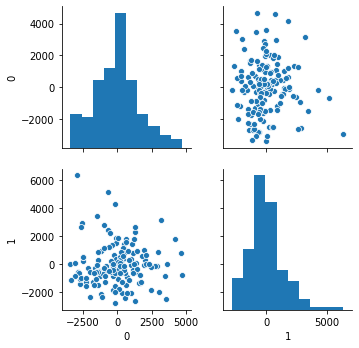

In [12]:
x1=pd.DataFrame(x_train)
sns.pairplot(x1.iloc[:,:2])

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.fit_transform(x_test)

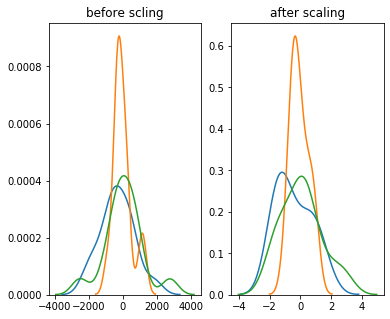

In [12]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(6,5))
ax1.set_title("before scling")
sns.kdeplot(x[0],ax=ax1)
sns.kdeplot(x[1],ax=ax1)
sns.kdeplot(x[2],ax=ax1)
ax2.set_title("after scaling")
sns.kdeplot(x_train[0],ax=ax2)
sns.kdeplot(x_train[1],ax=ax2)
sns.kdeplot(x_train[2],ax=ax2)


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
parameters=[{'C':[1,10,100,1000],'kernel':['linear']},
           {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search=GridSearchCV(SVC(),param_grid=parameters,cv=10)

In [14]:
grid_search.fit(x_train,y_train)
#SVC().get_params().keys()

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [15]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [17]:
models=[]
models.append(("LR",LogisticRegression()))
models.append(("knn",KNeighborsClassifier()))
models.append(("decision tree",DecisionTreeClassifier()))
models.append(("svc",SVC(kernel="rbf")))
models.append(("nb",GaussianNB()))
models.append(("randomforest classifer",RandomForestClassifier()))
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=10,random_state=7)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)
    

LR:0.662500(0.097628)
knn:0.681250(0.094580)
decision tree:0.543750(0.118750)
svc:0.650000(0.105327)
nb:0.650000(0.131696)
randomforest classifer:0.631250(0.090355)


In [18]:
from sklearn.metrics import accuracy_score
scores=[]
k_range=range(1,50)
for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=k)

    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores.append(accuracy_score(y_test,y_pred))
    

    

In [19]:
len(scores)

49

Text(0, 0.5, 'testing accuracy')

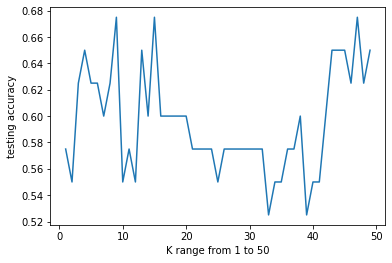

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,scores)
plt.xlabel("K range from 1 to 50")
plt.ylabel("testing accuracy")

In [21]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [23]:
print("accuracy of knn for 8  neighbors is",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy of knn for 8  neighbors is 0.675
              precision    recall  f1-score   support

           0       0.67      0.76      0.71        21
           1       0.69      0.58      0.63        19

    accuracy                           0.68        40
   macro avg       0.68      0.67      0.67        40
weighted avg       0.68      0.68      0.67        40



In [24]:
svc=SVC(kernel='rbf')

In [25]:
svc.fit(x_train,y_train)
y_pred_svc=svc.predict(x_test)

In [26]:
print(confusion_matrix(y_pred,y_pred_svc))
print(accuracy_score(y_pred,y_pred_svc))

[[18  6]
 [ 1 15]]
0.825


In [27]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.58      0.52      0.55        21
           1       0.52      0.58      0.55        19

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40



In [28]:
y_pred_svc_train=svc.predict(x_train)

In [29]:
print(accuracy_score(y_train,y_pred_svc_train))
print(confusion_matrix(y_train,y_pred_svc_train))
print(classification_report(y_train,y_pred_svc_train))

0.93125
[[78  1]
 [10 71]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.93        79
           1       0.99      0.88      0.93        81

    accuracy                           0.93       160
   macro avg       0.94      0.93      0.93       160
weighted avg       0.94      0.93      0.93       160



### neural network

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [31]:
classifier=Sequential()

In [32]:
classifier.add(Dense(output_dim=1,init='uniform',activation='relu',input_dim=15))

In [33]:
classifier.add(Dense(output_dim=6,init='uniform',activation='relu'))

In [34]:
classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))

In [35]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
classifier.fit(x_train,y_train,batch_size=100,nb_epoch=100)

Epoch 1/100
160/160 [==============================] - 1s 6ms/step - loss: 0.6932 - accuracy: 0.4938
Epoch 2/100
160/160 [==============================] - 0s 63us/step - loss: 0.6932 - accuracy: 0.4062
Epoch 3/100
160/160 [==============================] - 0s 105us/step - loss: 0.6931 - accuracy: 0.5063
Epoch 4/100
160/160 [==============================] - 0s 116us/step - loss: 0.6931 - accuracy: 0.5063
Epoch 5/100
160/160 [==============================] - 0s 89us/step - loss: 0.6931 - accuracy: 0.5063
Epoch 6/100
160/160 [==============================] - 0s 128us/step - loss: 0.6931 - accuracy: 0.5063
Epoch 7/100
160/160 [==============================] - 0s 92us/step - loss: 0.6931 - accuracy: 0.5063
Epoch 8/100
160/160 [==============================] - 0s 94us/step - loss: 0.6931 - accuracy: 0.5063
Epoch 9/100
160/160 [==============================] - 0s 117us/step - loss: 0.6931 - accuracy: 0.5063
Epoch 10/100
160/160 [==============================] - 0s 96us/step - loss: 0.

In [37]:
y_pre_dnn=classifier.predict(x_test)

In [38]:
y_pred_dnn=(y_pre_dnn>0.5)

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
print(confusion_matrix(y_test,y_pred_dnn))

[[ 6 15]
 [10  9]]


In [41]:
print(classification_report(y_test,y_pred_dnn))

              precision    recall  f1-score   support

           0       0.38      0.29      0.32        21
           1       0.38      0.47      0.42        19

    accuracy                           0.38        40
   macro avg       0.38      0.38      0.37        40
weighted avg       0.38      0.38      0.37        40



In [42]:
print(accuracy_score(y_pred,y_pred_dnn))

0.65


In [43]:
y_pred_dnn_train=classifier.predict(x_train)
y_pred_dnn_train=(y_pred_dnn_train>0.5)

In [44]:
print(accuracy_score(y_train,y_pred_dnn_train))
print(classification_report(y_train,y_pred_dnn_train))
print(confusion_matrix(y_train,y_pred_dnn_train))

0.68125
              precision    recall  f1-score   support

           0       0.71      0.59      0.65        79
           1       0.66      0.77      0.71        81

    accuracy                           0.68       160
   macro avg       0.69      0.68      0.68       160
weighted avg       0.69      0.68      0.68       160

[[47 32]
 [19 62]]
